In [1]:
import pandas as pd

In [6]:
path = "/home/rodrigo/Documentos/mestrado/GitHub/imagens/swedish/train/leaf15/l15nr001.csv"
df = pd.read_csv(path, header=None)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
0,3.427475,1.024951,0.545679,0.459391,1.428752,3.152312,3.421317,1.034929,0.544451,0.459361,...,0.509038,0.437636,21.902907,19.72806,26.558504,30.055013,516.127567,419.962256,751.476209,975.714814


In [10]:
from torchvision import models

model = models.convnext_tiny(weights=models.ConvNeXt_Tiny_Weights.DEFAULT)

In [12]:
from torch import nn
backbone = nn.Sequential(*list(model.children())[:-1])

In [13]:
backbone

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, o

In [14]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [18]:
model = models.swin_t(weights=models.Swin_T_Weights.DEFAULT)
model

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlock(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttention(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=384, out_features=96, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (1): SwinTransformerBlock(
       

In [5]:
import yaml

In [6]:
# Carregar hiperparâmetros do arquivo YAML
def load_hyperparameters(file_path):
    with open(file_path, 'r') as file:
        hyperparams = yaml.safe_load(file)  # Carregar o YAML
    return hyperparams


In [7]:
hyperparams = load_hyperparameters('config_mlp.yaml')

In [ ]:
from model import CustomModel

model = CustomModel(
    tmodel="convnext_t",
    input_dim=hyperparams["INPUT_NETWORK"],
    epochs=hyperparams['MAX_EPOCHS'],               # Fixo
    learning_rate=5e-5,       # Variável do sweep
    scale_factor=hyperparams['SCALE_FACTOR'],       # Fixo
    drop_path_rate=hyperparams['DROP_PATH_RATE'],   # Fixo
    num_classes=hyperparams['NUM_CLASSES'],         # Fixo
    label_smoothing=hyperparams['LABEL_SMOOTHING'],
    optimizer_momentum=hyperparams['OPTIMIZER_MOMENTUM'],
    hidden_layers=hyperparams["HIDDEN_LAYERS"],
    hidden_units=hyperparams["HIDDEN_UNITS"]
)

NameError: name 'yaml' is not defined

In [ ]:
model = models.swin_v2_t(weights=models.Swin_V2_T_Weights.DEFAULT)
model

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlockV2(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttentionV2(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
          (cpb_mlp): Sequential(
            (0): Linear(in_features=2, out_features=512, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=512, out_features=3, bias=False)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='

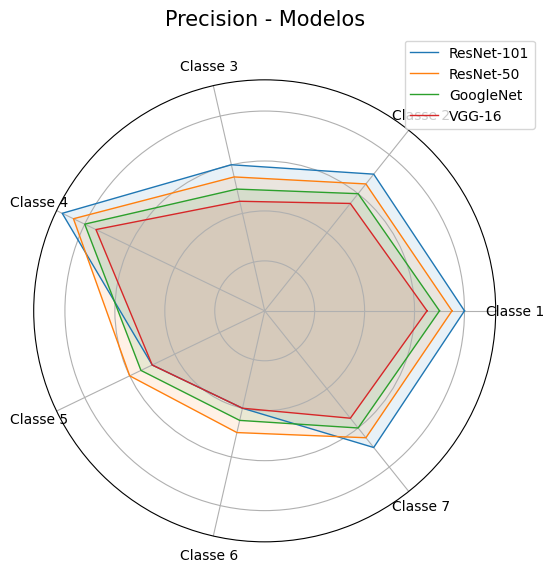

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Nome das classes (substitua pelos nomes das suas classes)
classes = ['Classe 1', 'Classe 2', 'Classe 3', 'Classe 4', 'Classe 5', 'Classe 6', 'Classe 7']

# Dados de exemplo: Precision, Recall, e F1 para cada modelo e classe
# Cada linha representa uma métrica para um modelo
# Ajuste esses valores para os seus resultados reais
precision_data = [
    [0.8, 0.7, 0.6, 0.9, 0.5, 0.4, 0.7],  # Modelo 1 (ResNet-101)
    [0.75, 0.65, 0.55, 0.85, 0.6, 0.5, 0.65],  # Modelo 2 (ResNet-50)
    [0.7, 0.6, 0.5, 0.8, 0.55, 0.45, 0.6],  # Modelo 3 (GoogleNet)
    [0.65, 0.55, 0.45, 0.75, 0.5, 0.4, 0.55]  # Modelo 4 (VGG-16)
]

# Criação dos ângulos para o radar
num_vars = len(classes)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Fechar o gráfico

# Função para criar gráficos de radar
def plot_radar(data, title, labels):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Desenhar uma linha e preencher para cada modelo
    for idx, values in enumerate(data):
        values += values[:1]  # Fechar o gráfico
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=labels[idx])
        ax.fill(angles, values, alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(classes, fontsize=10)
    plt.title(title, size=15, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Exibir gráficos de radar para precisão, recall e F1
plot_radar(precision_data, 'Precision - Modelos', ['ResNet-101', 'ResNet-50', 'GoogleNet', 'VGG-16'])
# Repita para os dados de recall e F1 se tiver


In [1]:
from torchvision import models

model = models.convnext_tiny()

In [2]:
model

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [ ]:
import pytorch_lightning as pl

model = model.load_from_checkpoint()